In [1]:
import btrdb
import utils
import plots

import numpy as np
import os

from matplotlib import pyplot as plt

db = btrdb.connect()

# Data Exploration

In [2]:
collections = db.list_collections('POW/signatures')
print(len(collections), 'event collections')
for coll in np.random.choice(collections, 2):
    utils.print_metadata_summary(db, coll)

253 event collections

 POW/signatures/event0001
   Phase: 2
   EventId: 0001
   Cause: Tree
   SiteName: Site0009
   DataSource: https://pqmon.epri.com/see_all.html
   FeederId: F_0000065
   EventTime: 2005-01-01 10:10:34.487000
   Weather: Clear Weather
   FailedEquipmentCode: LINE CUT
   IsolationEquipmentCode: Recloser
   Details: Fault caused line recloser lockout. Tree Outside Right of Way (Fall/Lean On Primary)

 POW/signatures/event21854
   DataSource: https://pqmon.epri.com/see_all.html
   Details: bad weather blew down a tree that
   Weather: Unknown
   FailedEquipmentCode: Unknown
   IsolationEquipmentCode: Unknown
   EventTime: 2006-10-19 16:44:30.000000
   Cause: Tree
   Phase: 7
   EventId: 21854
   FeederId: F_0000044
   SiteName: Site0002


In [3]:
df = utils.get_points_from_collection(db, collections[0])
df.head()

,POW/signatures/event0001/Vb,POW/signatures/event0001/Vc,POW/signatures/event0001/Ib,POW/signatures/event0001/In,POW/signatures/event0001/Ia,POW/signatures/event0001/Ic,POW/signatures/event0001/Va
time,,,,,,,
1104574234470333312,538.717834,16470.896484,9.328082,-42.494595,-193.816803,141.994125,-17780.736328
1104574234471374976,-6405.941406,19252.875000,-41.458141,4.145817,-121.265060,166.869019,-13070.193359
1104574234472416640,-12939.132812,19007.519531,-89.135002,10.364532,-75.661110,175.160645,-5861.127930
1104574234473458304,-17881.316406,16376.412109,-116.082794,32.130066,1.036453,147.176407,1607.771729
1104574234474499968,-19505.851562,10480.995117,-136.811859,10.364540,67.369476,79.806923,8422.894531


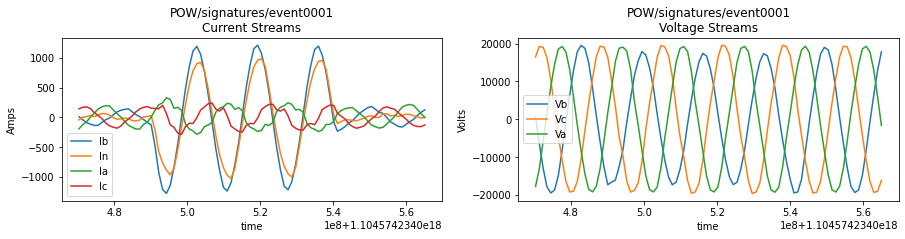

In [4]:
streams = db.streams_in_collection(collections[0])
plots.plot_event_timeseries(df, streams)

# Metadata Queries

In [5]:
db.collection_metadata('POW/signatures')

({'name': 0, 'unit': 0, 'ingress': 0, 'distiller': 0},
 {'Cause': 1766,
  'DataSource': 1766,
  'Details': 1766,
  'EventId': 1766,
  'EventTime': 1766,
  'FailedEquipmentCode': 1766,
  'FeederId': 1766,
  'IsolationEquipmentCode': 1766,
  'Phase': 1766,
  'SiteName': 1766,
  'Weather': 1766})

In [6]:
streams = db.streams_in_collection('POW/signatures', 
                                   annotations={'Cause': 'Lightning'},
                                  tags={'name': 'In'})

collections = list(set([s.collection for s in streams]))
print(len(collections), 'events caused by lightning')

23 events caused by lightning


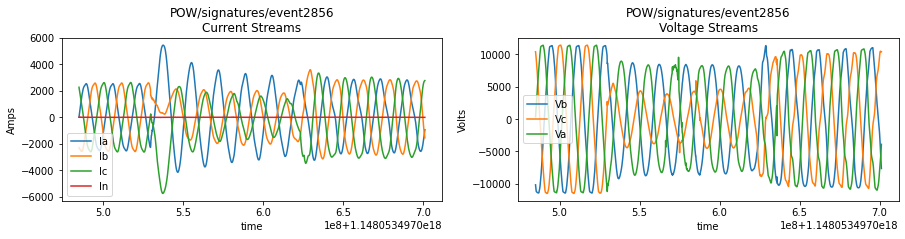

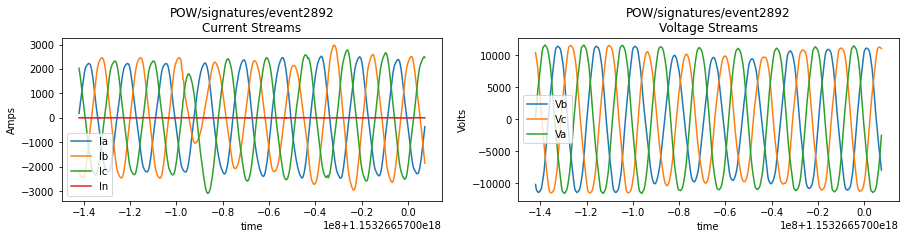

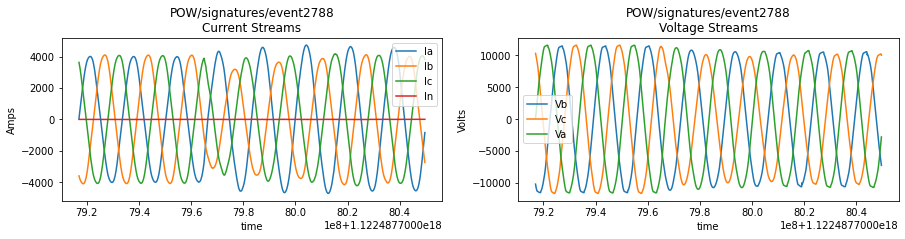

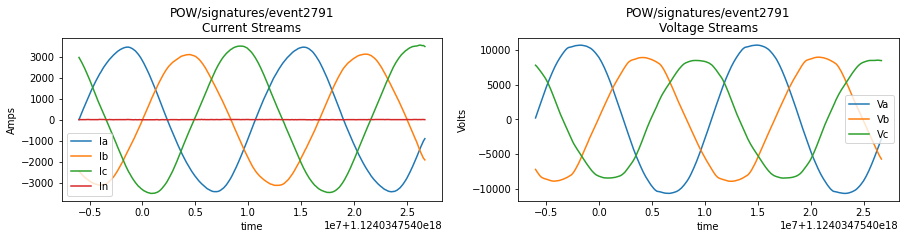

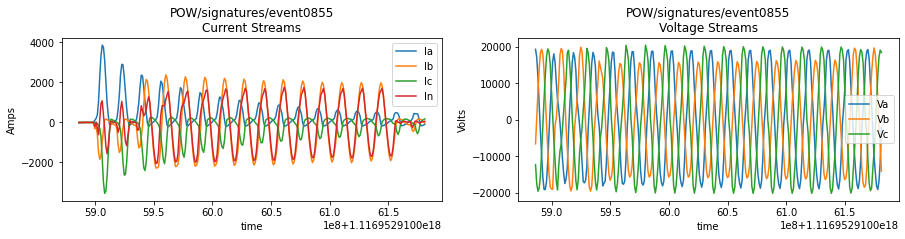

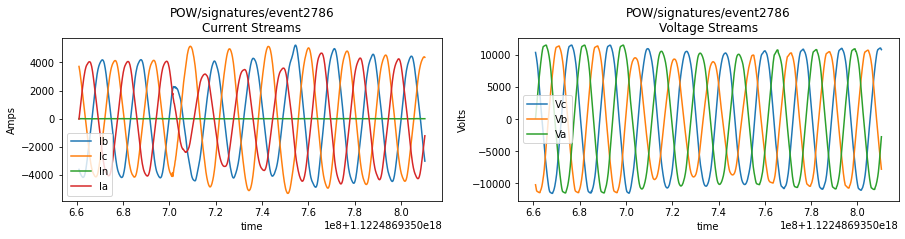

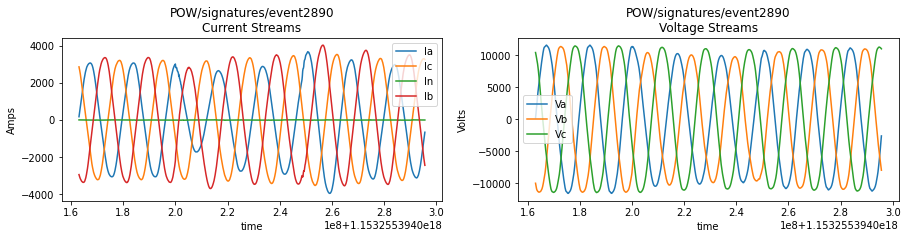

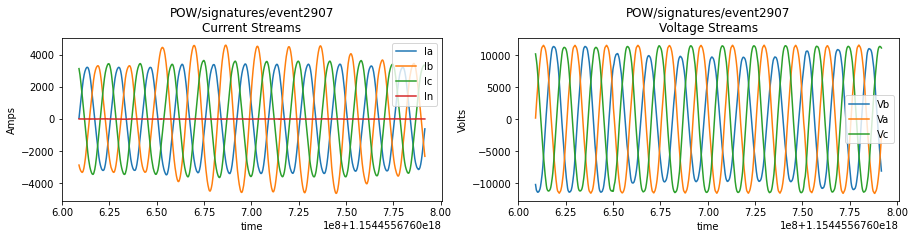

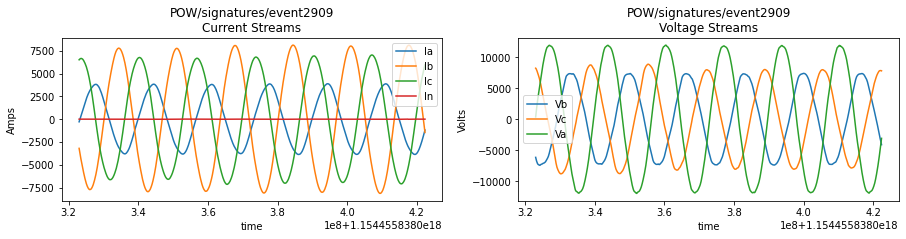

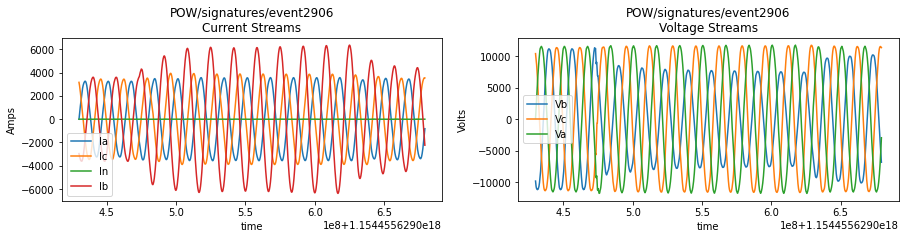

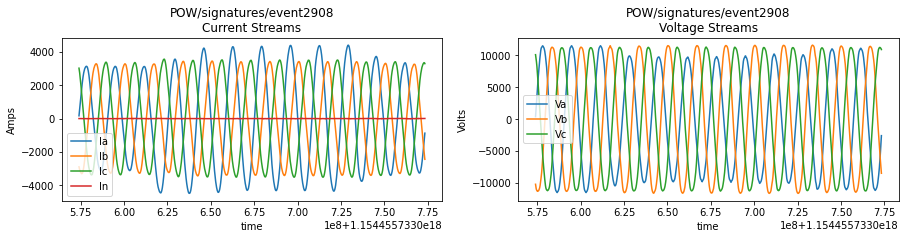

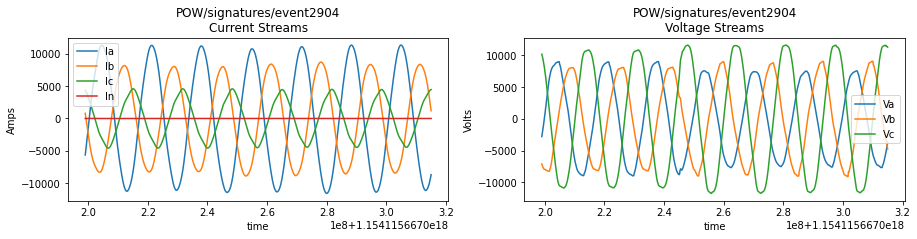

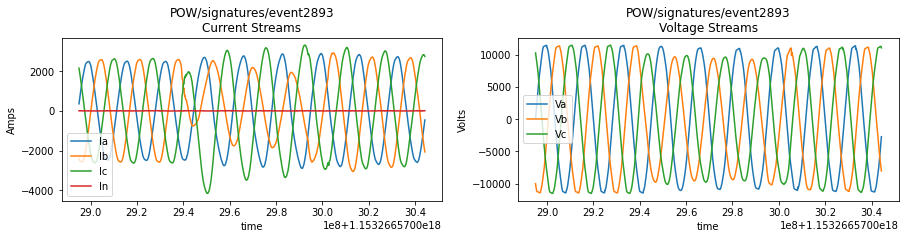

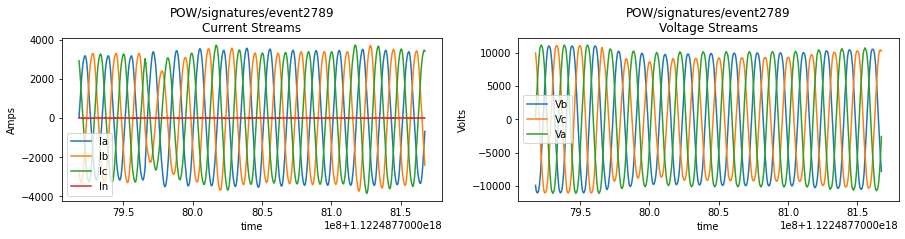

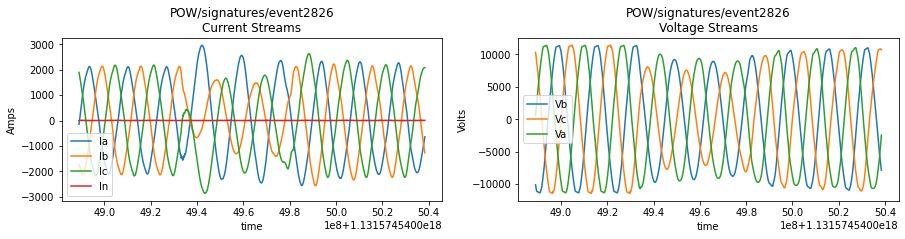

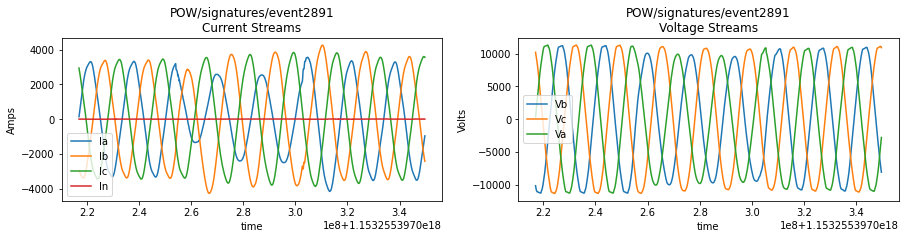

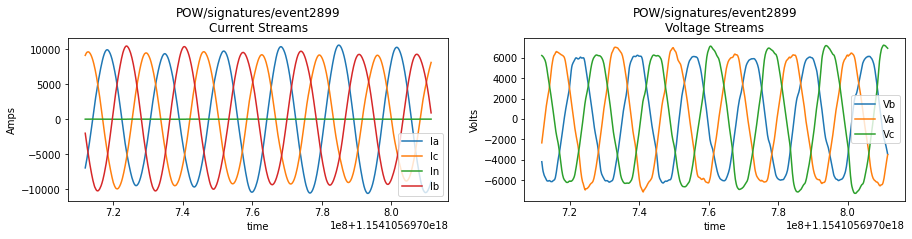

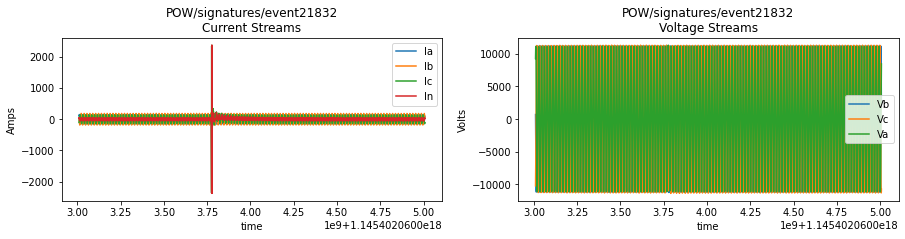

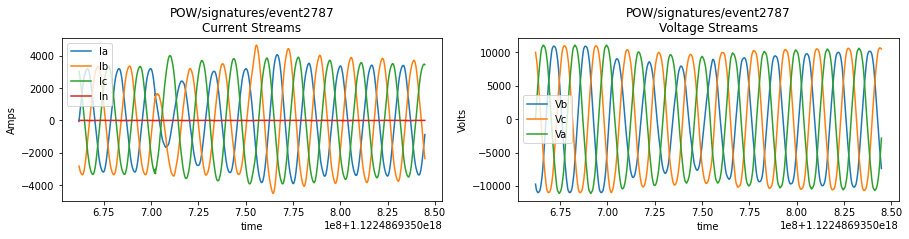

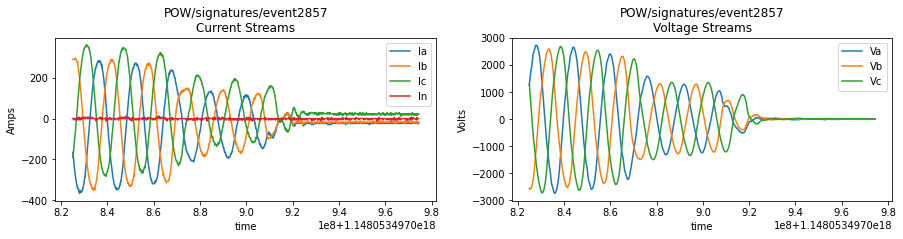

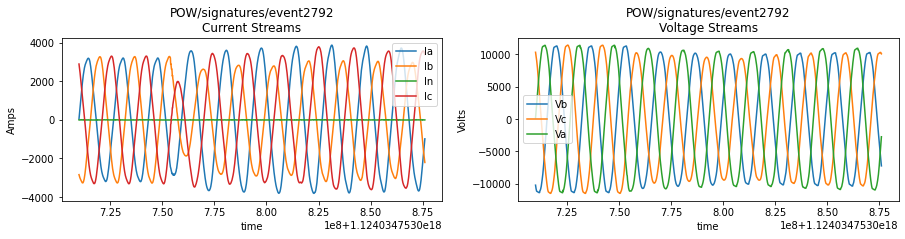

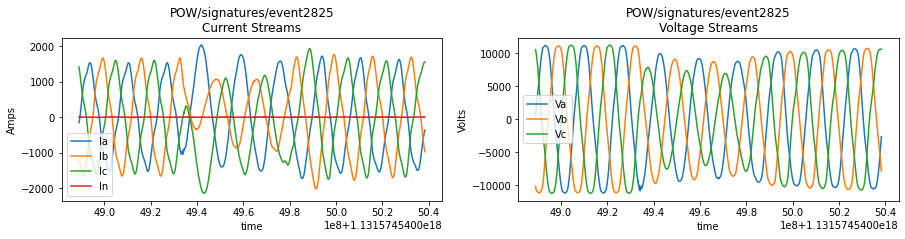

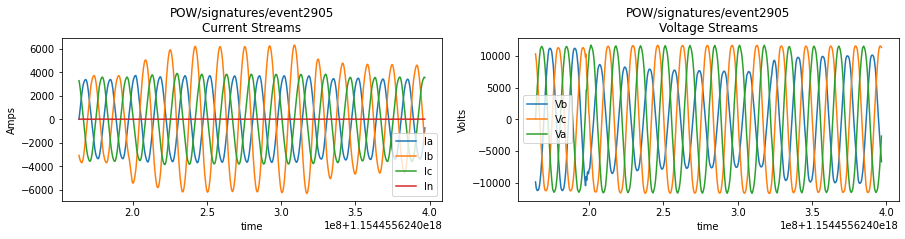

In [7]:
for collection in collections:
    streams = db.streams_in_collection(collection)
    
    df = utils.get_points_from_collection(db, collection)
    plots.plot_event_timeseries(df, streams)